<a href="https://colab.research.google.com/github/ollie3951/ELE2038-Control-H5/blob/main/Control_H5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Control H5

In [1]:
!pip install control

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import control as ctrl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 6.5 MB/s eta 0:00:00


# 1. Dynamic System Analysis

The system dynamics is described by the following set of differential equations (which are linear and already in state space representation). State variables are $\alpha, r, \theta$ and input variable is $\delta$.

$$\dot{\alpha}=-0.31\alpha + 57.4r +0.232\delta,$$

$$\dot{r}=-0.016\alpha-0.425r+0.0203\delta,$$

$$\dot{\theta}=56.7r.$$

We will find 3 transfer functions to analyse the system dynamics:

$$G_{\alpha}(s)=\frac{Α(s)}{\Delta(s)},$$

$$G_{r}(s)=\frac{R(s)}{\Delta(s)},$$

$$G_{\theta}(s)=\frac{\Theta(s)}{\Delta(s)}.$$

For each state variable we will find the impulse, step, and frequency response. We assume that the system has zero initial conditions.

## Analysis of $G_{\alpha}$ (relating angle of attack $\alpha$ to deflection angle of elevators $\delta$)

See notes for derivation of $G_{\alpha}$ using the system of differential equations.

In [2]:
# Defining G_alpha:

s = sym.symbols('s')

num = 57.4*(29*(s+0.425)+145.6525)
den = 7175*((s+0.31)*(s+0.425)+0.9184)

G_alpha = num / den

G_alpha

(1664.6*s + 9067.9085)/(7175*(s + 0.31)*(s + 0.425) + 6589.52)

Poles of $G_{\alpha}$ occur when $s^{2}+0.735s+1.05015=0$, which can be solved using the quadratic formula to give

$$s=-0.3675 \pm j0.9566.$$

Since the poles have only negative real parts, $G_{\alpha}(s)$ is BIBO stable.

Finding impulse response of $G_{\alpha}$

In [3]:
t = sym.symbols('t')

# input for impulse response
Delta = 1

A = Delta*G_alpha
a = sym.inverse_laplace_transform(A, s, t)

a

(1.23202324699072*exp(-0.3675*t)*sin(0.956605326140305*t) + 0.232*exp(-0.3675*t)*cos(0.956605326140305*t))*Heaviside(t)

Plotting impulse response of $G_{\alpha}$

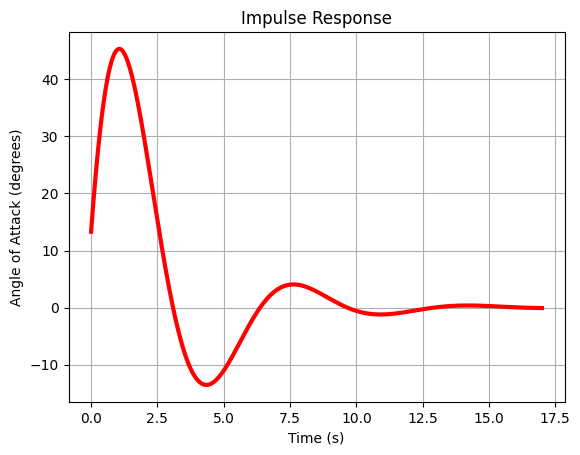

In [4]:
s = ctrl.TransferFunction.s

# times to find impulse response at
ts = np.linspace(0, 17, 1000)

# defining angle of attack transfer function
num = 57.4*(29*(s+0.425)+145.6525)
den = 7175*((s+0.31)*(s+0.425)+0.9184)
G_alpha = num / den

# getting impulse response of the system (angle of attack a over time t)
t_imp, a_imp = ctrl.impulse_response(G_alpha, ts)

# plotting impulse response
plt.plot(t_imp, np.rad2deg(a_imp), 'r', linewidth=3)
plt.xlabel('Time (s)')
plt.ylabel('Angle of Attack (degrees)')
plt.title('Impulse Response')
plt.grid()
plt.show()

This shows that when the deflection angle of the elevators $\delta$ is a unit impulse, the angle of attack $\alpha$ of the aircraft reaches a maximum angle of roughly 45 degrees, before stabilising at (roughly) 0 degrees after 12.5 seconds.

**Comment on the speed of this stabilisation and the maximum**

Finding step response of $G_{\alpha}$

In [5]:
s = sym.symbols('s')

# defining angle of attack transfer function
num = 57.4*(29*(s+0.425)+145.6525)
den = 7175*((s+0.31)*(s+0.425)+0.9184)
G_alpha = num / den

# input for step response
Delta = 1/s

A = Delta*G_alpha
a = sym.inverse_laplace_transform(A, s, t)

a

(-0.21981251021715*exp(-0.3675*t)*sin(0.956605326140305*t) - 1.20346617149931*exp(-0.3675*t)*cos(0.956605326140305*t))*Heaviside(t) + 1.20346617149931*Heaviside(t)

Plotting step response of $G_{\alpha}$

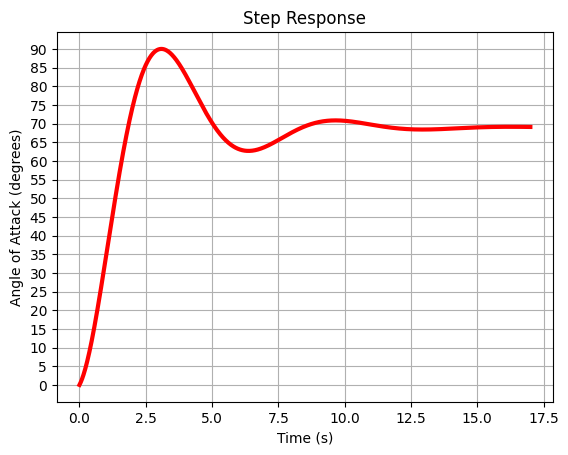

In [6]:
s = ctrl.TransferFunction.s

# times to find step response at
ts = np.linspace(0, 17, 1000)

# defining angle of attack transfer function
num = 57.4*(29*(s+0.425)+145.6525)
den = 7175*((s+0.31)*(s+0.425)+0.9184)
G_alpha = num / den

# getting step response of the system (angle of attack a over time t)
t_step, a_step = ctrl.step_response(G_alpha, ts)

# plotting step response
plt.plot(t_step, np.rad2deg(a_step), 'r', linewidth=3)
plt.xlabel('Time (s)')
plt.ylabel('Angle of Attack (degrees)')
plt.title('Step Response')
plt.yticks(np.linspace(0, 90, 19))
plt.grid()
plt.show()

This shows that when the deflection angle of the elevators $\delta$ is a unit step, the angle of attack $\alpha$ of the aircraft reaches a maximum angle of roughly 90 degrees, before stabilising just beneath 70 degrees after 15 seconds.

**Comment on the speed of this stabilisation and the maximum, overshoot, what type of response? (first or second order?)**

Finding frequency response of $G_{\alpha}$

In [7]:
s = sym.symbols('s')
omega = sym.symbols('\omega', positive=True)
A = sym.symbols('A', real=True)

# defining angle of attack transfer function
num = 57.4*(29*(s+0.425)+145.6525)
den = 7175*((s+0.31)*(s+0.425)+0.9184)
G_alpha = num / den

# input for frequency response
Delta = A*omega / (s**2 + omega**2)

A = Delta*G_alpha
a = sym.inverse_laplace_transform(A, s, t)

a

A*\omega*(((-0.095322852529716*\omega**6 - 0.132850268035009*\omega**4 + 0.334132908147393*\omega**2 - 0.310509774654115)*cos(\omega*t)/(0.410874364352224*\omega**8 - 1.28198964793359*\omega**6 + 1.90623684273554*\omega**4 - 1.41379744243065*\omega**2 + 0.499705802055863) + (-0.449208942546287*\omega**6 + 1.24611233284218*\omega**4 - 1.34612306774015*\omega**2 + 0.601379028476162)*sin(\omega*t)/(\omega*(0.410874364352224*\omega**8 - 1.28198964793359*\omega**6 + 1.90623684273554*\omega**4 - 1.41379744243065*\omega**2 + 0.499705802055863)))*Heaviside(t) + ((586589444608729.0*\omega**2 + 1.73264590438109e+15)*exp(-t*(1.85837604218714e+15*\omega**4 - 2.8992060040151e+15*\omega**2 + 2.04944501677807e+15)/(2*(2.52840277848591e+15*\omega**4 - 3.9444979646464e+15*\omega**2 + 2.788360567045e+15)))*cos(0.956605326140305*t*sqrt((0.640994823966797*\omega**4 - 1.0*\omega**2 + 0.706898721215326)/(0.640994823966797*\omega**4 - 1.0*\omega**2 + 0.706898721215326)))/(2.52840277848591e+15*\omega**4 - 3.9

Plotting frequency response of $G_{\alpha}$, assuming unit amplitude and angular frequency i.e. $\delta(t)=\sin{t}$.

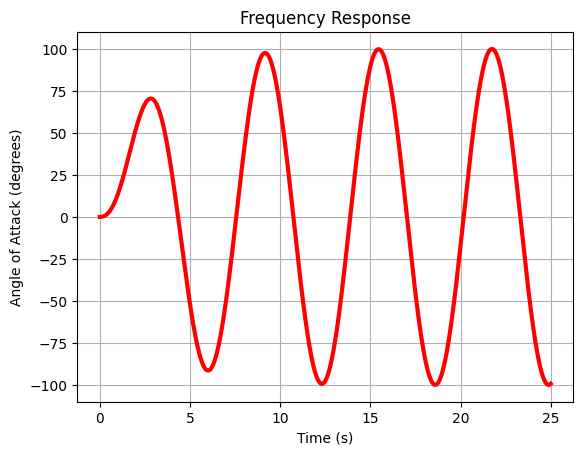

In [8]:
s = ctrl.TransferFunction.s

# times to find frequency response at
ts = np.linspace(0, 25, 1000)

# defining s domain input for frequency response
Delta = 1 / (s**2 + 1)

# defining angle of attack transfer function
num = 57.4*(29*(s+0.425)+145.6525)
den = 7175*((s+0.31)*(s+0.425)+0.9184)
G_alpha = num / den

# getting impulse response of the system (angle of attack a over time t)
t_freq, a_freq = ctrl.impulse_response(G_alpha*Delta, ts) # impulse response acts as ILT here

# plotting impulse response
plt.plot(t_freq, np.rad2deg(a_freq), 'r', linewidth=3)
plt.xlabel('Time (s)')
plt.ylabel('Angle of Attack (degrees)')
plt.title('Frequency Response')
plt.grid()
plt.show()

This shows that when the deflection angle of the elevators $\delta$ is $\sin{t}$, the angle of attack $\alpha$ of the aircraft oscillates with period $2\pi$, and with a maximum of $\alpha \approx 100$ degrees. **Add a $\delta(t) = \sin{2t}$ line to this graph?**

## Analysis of $G_{r}$ (relating pitch rate $r$ to deflection angle of elevators $\delta$)

See notes for derivation of $G_{r}$ using the system of differential equations.

In [9]:
# Finding G_r:

s = sym.symbols('s')

num = -0.003712 + 0.0203 * (s + 0.31)
den = (s + 0.425) * (s + 0.31) + 0.9184

G_r = num / den

G_r

(0.0203*s + 0.002581)/((s + 0.31)*(s + 0.425) + 0.9184)

Poles of $G_{r}$ occur when $s^{2}+0.735s+1.05015=0$, which can be solved using the quadratic formula to give

$$s=-0.3675 \pm j0.9566.$$

Since the poles have only negative real parts, $G_{r}(s)$ is BIBO stable (**Note poles are the same as for $G_{\alpha}$**).

Finding impulse response of $G_{r}$

In [10]:
t = sym.symbols('t')

# input for impulse response
Delta = 1

R = Delta*G_r
r = sym.inverse_laplace_transform(R, s, t)

r

(-0.00510058836875466*exp(-0.3675*t)*sin(0.956605326140305*t) + 0.0203*exp(-0.3675*t)*cos(0.956605326140305*t))*Heaviside(t)

Plotting impulse response of $G_{r}$

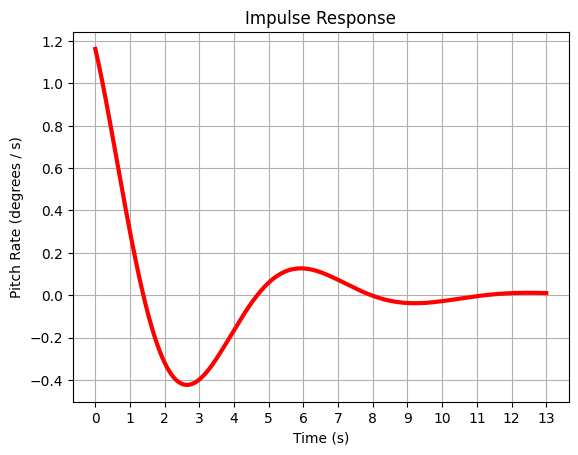

In [11]:
s = ctrl.TransferFunction.s

# times to find impulse response at
ts = np.linspace(0, 13, 1000)

# defining pitch rate transfer function
num = -0.003712 + 0.0203 * (s + 0.31)
den = (s + 0.425) * (s + 0.31) + 0.9184
G_r = num / den

# getting impulse response of the system (pitch rate r over time t)
t_imp, r_imp = ctrl.impulse_response(G_r, ts)

# plotting impulse response
plt.plot(t_imp, np.rad2deg(r_imp), 'r', linewidth=3)
plt.xlabel('Time (s)')
plt.xticks(np.linspace(0, 13, 14))
plt.ylabel('Pitch Rate (degrees / s)')
plt.title('Impulse Response')
plt.grid()
plt.show()

This shows that when the deflection angle of the elevators $\delta$ is a unit impulse, the pitch rate $r$ of the aircraft reaches a maximum of roughly 1.2 degrees/s, before stabilising at (roughly) 0 degrees/s after 11 seconds.

**Comment on the speed of this stabilisation and the maximum**

Finding step response of $G_{r}$

In [12]:
s = sym.symbols('s')

# defining pitch rate transfer function
num = -0.003712 + 0.0203 * (s + 0.31)
den = (s + 0.425) * (s + 0.31) + 0.9184
G_r = num / den

# input for step response
Delta = 1/s

R = Delta*G_r
r = sym.inverse_laplace_transform(R, s, t)

r

(0.0202766788993625*exp(-0.3675*t)*sin(0.956605326140305*t) - 0.0024577441317907*exp(-0.3675*t)*cos(0.956605326140305*t))*Heaviside(t) + 0.0024577441317907*Heaviside(t)

Plotting step response of $G_{r}$

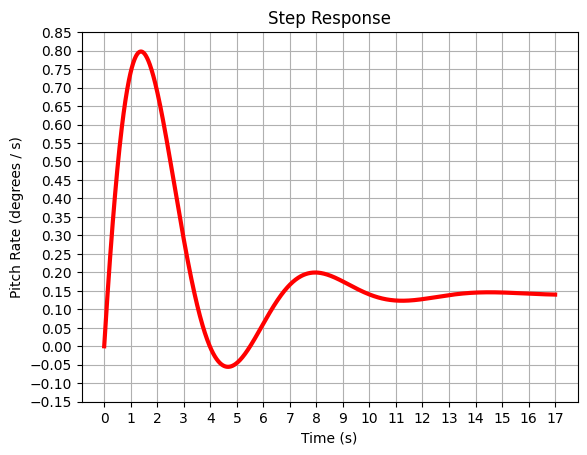

In [22]:
s = ctrl.TransferFunction.s

# times to find step response at
ts = np.linspace(0, 17, 1000)

# defining pitch rate transfer function
num = -0.003712 + 0.0203 * (s + 0.31)
den = (s + 0.425) * (s + 0.31) + 0.9184
G_r = num / den

# getting step response of the system (pitch rate r over time t)
t_step, r_step = ctrl.step_response(G_r, ts)

# plotting step response
plt.plot(t_step, np.rad2deg(r_step), 'r', linewidth=3)
plt.xlabel('Time (s)')
plt.xticks(np.linspace(0, 17, 18))
plt.ylabel('Pitch Rate (degrees / s)')
plt.yticks(np.linspace(-0.15, 0.85, 21))
plt.title('Step Response')
plt.grid()
plt.show()

This shows that when the deflection angle of the elevators $\delta$ is a unit step, the pitch rate $r$ of the aircraft reaches a maximum of roughly 0.8 degrees/s, before stabilising at (roughly) 0.15 degrees/s after 13.5 seconds.

**Comment on the speed of this stabilisation and the maximum**

## Analysis of $G_{\theta}$ (relating pitch angle $\theta$ to deflection angle of elevators $\delta$)